# 데이터 표현

- 연속형
- 범주형/이산형

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from scipy import sparse

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

### 범주형 변수

- 원 핫 인코딩(가변수)
> - 범주형 변수를 0 또는 1의 값을 가진 하나 이상의 새로운 특성으로 바꾸는 것
> - 스케일러와 다르게 훈련/테스트를 나누기 전에 전체 데이터에 대해 dummy를 적용해야 함
> - 범주형 값이 같은 방식으로 표현되어야 하기 때문에!

In [2]:
import os

#파일에 열 이름이 없어서 names로 열 이름 제공 - pandas...Dataframe
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'), header=None, index_col=False, 
    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
          'marital-status', 'occupation', 'relationship', 'race', 'gender',
          'capital-gain', 'capital-loss', 'hours-per-week','native-country' ,'income']
    )
    
    
# 열 선택
data = data[['age', 'workclass','education', 'gender','hours-per-week', 'occupation', 'income']]

In [3]:
display(data.head())



print(data.gender.value_counts()) # 성별에 따른 데이터 샘플 수

# 남성 21790 / 여성 10771

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


 Male      21790
 Female    10771
Name: gender, dtype: int64


In [4]:
data_dummies = pd.get_dummies(data)
# get_dummies = 객체 타입이나 범주형 열을 자동으로 변환
# 연속형을 제외하고 범주형을 새로운 특성으로 확장해준다.

display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [5]:
#타겟값 = income 제외

features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

X = features.values
y = data_dummies['income_ >50K'].values 
# income이 <= 50k , >50k로 나뉘어지는데 >50k 특성 하나로 타겟값 사용

print("X.shape: {}, y.shape: {}".format(X.shape, y.shape))

# income 관련 2개의 특성을 제외한 44개의 특성

X.shape: (32561, 44), y.shape: (32561,)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

log = LogisticRegression(max_iter=5000).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print("테스트 점수 : {:.2f}".format(log.score(X_test, y_test)))
print("테스트 점수 : {:.2f}".format(knn.score(X_test, y_test)))

테스트 점수 : 0.81
테스트 점수 : 0.77


### 숫자로 표현된 범주형 특성

- dummy에서는 숫자는 모두 연속형으로 간주해서 더미 변수를 만들지 않는다.
- 그래서 숫자를 문자열로 바꾸어서 더미함수를 적용한다.

In [7]:
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1],
                       '범주형 특성':['양말','여우','양말', '상자']})

display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [8]:
display(pd.get_dummies(demo_df))

# 숫자로 이루어진 특성은 더미 변수를 만들어주지 않는다

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [9]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df))


,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## OneHotEncoder

In [10]:
from sklearn.preprocessing import OneHotEncoder
#모든 특성이 범주형이라고 가정함

ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

print(ohe.get_feature_names())

#sparse = False -> 희소 행렬이 아닌 numpy 배열 반환
print(OneHotEncoder().fit_transform(demo_df))


[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]
['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']
  (0, 0)	1.0
  (0, 4)	1.0
  (1, 1)	1.0
  (1, 5)	1.0
  (2, 2)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (3, 3)	1.0


In [11]:
from sklearn.compose import ColumnTransformer
# 특성마다 적용할 방법을 결정할 수 있음!

from sklearn.preprocessing import StandardScaler

ct =ColumnTransformer(
    [("scaling", StandardScaler(), ['age','hours-per-week']),
    ("onehot", OneHotEncoder(sparse=False), ['workclass','education','gender','occupation'])]
    ) 


# 숫자형인 age와 hours-per-week는 스케일러로 스케일 조정하고
# 나머지 범주형 특성들은 원핫인코더 사용


In [12]:
data_features = data.drop("income", axis=1)

X_train, X_test, y_train, y_test = train_test_split(data_features, 
                                                    data.income
                                                    , random_state=0)

print(X_train.head())
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
# 위에서 만든 columntransformer에 적용해서 변환함

print(X_train_trans.shape)

log = LogisticRegression(max_iter=5000).fit(X_train_trans, y_train)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_trans, y_train)
X_test_trans = ct.transform(X_test)
print("LogisticRegression")
print("테스트 점수 : {:.2f}".format(log.score(X_test_trans, y_test)))
print("KneighborsClassifier")
print("테스트 점수 : {:.2f}".format(knn.score(X_test_trans, y_test)))



       age workclass education   gender  hours-per-week          occupation
26464   59   Private      12th     Male              35    Transport-moving
16134   71   Private   Masters   Female              20       Other-service
4747    42   Private   Masters     Male              40      Prof-specialty
8369    26   Private   HS-grad     Male              40               Sales
5741    46   Private   1st-4th     Male              40   Machine-op-inspct
(24420, 44)
LogisticRegression
테스트 점수 : 0.81
KneighborsClassifier
테스트 점수 : 0.78


In [13]:
from sklearn.compose import make_column_transformer

# make_column_transformer은 ColumnTransformer과 다르게 
#이름을 지정해주지 않아도 된다

ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass','education','gender','occupation']))
    
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
# 위에서 만든 columntransformer에 적용해서 변환함

print(X_train_trans.shape)

log = LogisticRegression(max_iter=5000).fit(X_train_trans, y_train)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_trans, y_train)
X_test_trans = ct.transform(X_test)
print("LogisticRegression")
print("테스트 점수 : {:.2f}".format(log.score(X_test_trans, y_test)))
print("KneighborsClassifier")
print("테스트 점수 : {:.2f}".format(knn.score(X_test_trans, y_test)))
        
    

(24420, 44)
LogisticRegression
테스트 점수 : 0.81
KneighborsClassifier
테스트 점수 : 0.78


ColumnTransformer과 make_column_transformer

그 외의 것은 remainder = MinMaxScaler() 이런식으로 나머지에 적용

## 구간분할 / 연속형

Linear score = 0.63
DecisionTree score = 0.86


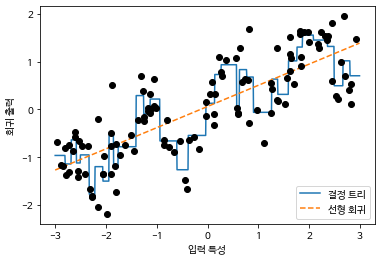

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)

dt = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
lreg = LinearRegression().fit(X,y)

plt.plot(line, dt.predict(line), label="결정 트리")
plt.plot(line, lreg.predict(line),'--', label="선형 회귀")

plt.plot(X[:,0], y ,'o', c='k')

plt.xlabel("입력 특성")
plt.ylabel("회귀 출력")
plt.legend(loc=4)

print("Linear score = {:.2f}".format(lreg.score(X,y)))
print("DecisionTree score = {:.2f}".format(dt.score(X,y)))

score 차이

- 선형은 직선이기 때문에 원본가 차이가 있음
- decisiontree는 특성을 하나씩 봐서 맞추기 때문에 더 정교함

연속형 데이터를 구간 데이터로 변경(binning, 이산화)

In [15]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

print(X[:10])

print(X_binned[:10])

# kbins를 적용하여 연속형을 one hot으로 변경
# 구간으로 변경함 - 10개의 구간이 생김

print(X.shape)
print(X_binned.shape)

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
(120, 1)
(120, 10)


Linear score = 0.72
DecisionTree score = 0.72


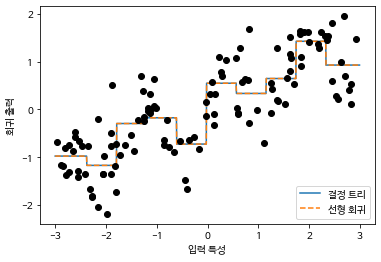

In [16]:
line_binned = kb.transform(line)

dt = DecisionTreeRegressor(min_samples_leaf=3).fit(X_binned,y)
lreg = LinearRegression().fit(X_binned,y)

plt.plot(line, dt.predict(line_binned), label="결정 트리")
plt.plot(line, lreg.predict(line_binned),'--', label="선형 회귀")

plt.plot(X[:,0], y ,'o', c='k')

plt.xlabel("입력 특성")
plt.ylabel("회귀 출력")
plt.legend(loc=4)

print("Linear score = {:.2f}".format(lreg.score(X_binned,y)))
print("DecisionTree score = {:.2f}".format(dt.score(X_binned,y)))

#print(dt.predict(line_binned))


- 10개의 구간으로 변경하여 적용.

- 결정트리와 선형회귀의 predict 결과가 일치함.
- 출력하는 값이 상숫값. 어떤 모델이든 같은 예측 결과를 가질 것임


- 결정 트리는 원래 특성별 가장 좋은 구간을 학습하기 때문에 구간 나누기가 도움되지 않음


- 비선형, 고차원 데이터의 선형모델은 구간 나누기가 유용함

### 원본 추가

In [17]:
X_combined = np.hstack([X,X_binned]) # X + X_binned로 11개의 특성
print(X_combined.shape)
print(X_combined[:5])

(120, 11)
[[-0.75275929  0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.        ]
 [ 2.70428584  0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.        ]
 [ 1.39196365  0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.        ]
 [ 0.59195091  0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.        ]
 [-2.06388816  0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]


Linear score = 0.73


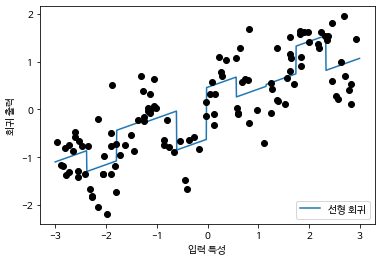

In [18]:
line_combined = np.hstack([line, line_binned])

lreg = LinearRegression().fit(X_combined,y)

plt.plot(line, lreg.predict(line_combined),'-', label="선형 회귀")

plt.plot(X[:,0], y ,'o', c='k')

plt.xlabel("입력 특성")
plt.ylabel("회귀 출력")
plt.legend(loc=4)

print("Linear score = {:.2f}".format(lreg.score(X_combined,y)))


원본X와 X_binned를 더한 데이터 -> 기울기가 같은 모델 생성됨

### 원본과의 곱 추가

In [19]:
X_product = np.hstack([X_binned , X*X_binned]) # X + X_binned로 11개의 특성
print(X_product.shape)
print(X_product[:5])

(120, 20)
[[ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.         -0.         -0.
  -0.         -0.75275929 -0.         -0.         -0.         -0.
  -0.         -0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          2.70428584]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.39196365
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.59195091  0.
   0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0

Linear score = 0.79


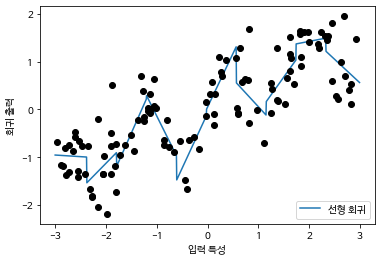

In [20]:
line_product = np.hstack([line_binned, line*line_binned])

lreg = LinearRegression().fit(X_product,y)

plt.plot(line, lreg.predict(line_product),'-', label="선형 회귀")

plt.plot(X[:,0], y ,'o', c='k')

plt.xlabel("입력 특성")
plt.ylabel("회귀 출력")
plt.legend(loc=4)

print("Linear score = {:.2f}".format(lreg.score(X_product,y)))


X_binned와 X*X_binned를 더한 데이터 -> 구간별 기울기와 절편이 달라짐

- 앞에 10개 / 뒤 10개(X_binned=1인 곳만 원본 값이 들어감)
- 1하나 / 원본 데이터 하나 나머지 0
- 정확도가 더 늘었음

### 다항식 추가 PolynomialFeatures

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias = False)
# 절편 포함 X

poly.fit(X)
X_poly = poly.transform(X)

X_poly.shape

# degree=10 10차원이므로 10개의 새 특성이 생성됨
# X0 X0^2 ... x0^10 >항
# 원본 + ^2 ~ ^10

(120, 10)

Linear score = 0.73


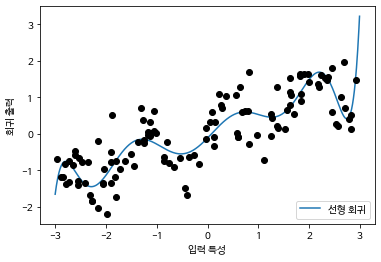

In [22]:
line_poly = poly.transform(line)

lreg = LinearRegression().fit(X_poly,y)

plt.plot(line, lreg.predict(line_poly),'-', label="선형 회귀")

plt.plot(X[:,0], y ,'o', c='k')

plt.xlabel("입력 특성")
plt.ylabel("회귀 출력")
plt.legend(loc=4)

print("Linear score = {:.2f}".format(lreg.score(X_poly,y)))


다항식 특성을 적용하니 일차원 데이터에 대해서도 선형 회귀로 곡선 회귀가 가능해짐

gamma = 1 , score = 0.75
gamma = 10 , score = 0.79


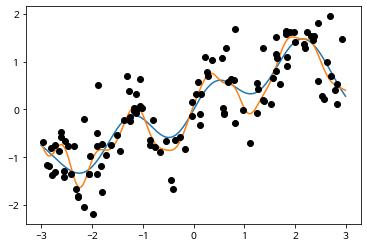

In [23]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label="gamma = {}".format(gamma))
    print("gamma = {} , score = {:.2f}".format(gamma, svr.score(X,y)))
plt.plot(X, y, 'ko', )

원본 데이터에 대한 SVC

- gamma = 커널폭의 역수
- 클수록 커널이 작아져서 특정 포인트에 민감해지고
- 작을수록 커널폭이 커져서 많은 포인트를 고려한다


- 결과로는 gamma 10 이 좋으나 과대적합 주의...

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_boston

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                   boston.target,
                                                   random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

# minmaxscaler로 스케일링한 후

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
# 2차 다항식 특성 적용

X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


print("다항식특성 적용 후")
print(X_train_poly.shape)
print(X_test_poly.shape)

# 원래 특성의 제곱 + 가능한 두 특성의 조합 포함
# 절편 + 원본 13개 + 원본 제곱 13개 + 13*12 / 2  = 105

# make_wave는  특성이 하나라서 그대로 10개만 생성

print(poly.get_feature_names())

(379, 13)
(127, 13)
다항식특성 적용 후
(379, 105)
(127, 105)
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [25]:
from sklearn.linear_model import Ridge

# minmax로 스케일링만 한 데이터
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(ridge.score(X_test_scaled, y_test)))


# polynomial적용
ridge = Ridge( ).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(ridge.score(X_test_poly, y_test)))



상호작용 특성이 없을 때 점수 : 0.621
상호작용 특성이 있을 때 점수 : 0.753


In [26]:


# minmax로 스케일링만 한 데이터
lr = LinearRegression().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(lr.score(X_test_scaled, y_test)))


# polynomial적용
lr = LinearRegression().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(lr.score(X_test_poly, y_test)))



상호작용 특성이 없을 때 점수 : 0.635
상호작용 특성이 있을 때 점수 : 0.607


- ridge는 특성을 추가하면 좀 더 성능이 개선되는 것을 확인
- 반면 선형회귀는 오히려 점수가 좀 떨어짐

In [27]:
from sklearn.ensemble import RandomForestRegressor

# minmax로 스케일링만 한 데이터
rf = RandomForestRegressor(random_state=0, n_estimators=100).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(rf.score(X_test_scaled, y_test)))


# polynomial적용
rf = RandomForestRegressor(random_state=0, n_estimators=100).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(rf.score(X_test_poly, y_test)))


상호작용 특성이 없을 때 점수 : 0.795
상호작용 특성이 있을 때 점수 : 0.775


randomforest는 알아서 구간을 나눠서 잘 맞추기 때문에 상호작용 특성 추가가 도움되지 않음

In [28]:
from sklearn.ensemble import  GradientBoostingRegressor

# minmax로 스케일링만 한 데이터
gb = GradientBoostingRegressor(random_state=0, n_estimators=100).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(gb.score(X_test_scaled, y_test)))


# polynomial적용
gb = GradientBoostingRegressor(random_state=0, n_estimators=100).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(gb.score(X_test_poly, y_test)))


상호작용 특성이 없을 때 점수 : 0.815
상호작용 특성이 있을 때 점수 : 0.789


gradient boosting 역시 알아서 나누기 때문에 도움이 되지 않음

데이터 특성과 모델에 따라서 특성 추가가 도움이 되기도 안 되기도 함 . > 많은 시행착오가 필요함...

## 일변량 비선형변환

- 비선형이거나 정규 분포가 아닌 데이터를 위해서
- log, exp, sin 함수를 적용한 특성 변환


1. 정규성 높이기
2. 큰 수를 작은 비율의 작은 수로 바꾸어줌(로그)
3. 로그에 의해 곱하기가 더하기로, 나누기가 빼기로 바꿈 > 계산식 쉬워짐


- 선형, 신경망을 위해

In [29]:
rnd = np.random.RandomState(0) # seed = 0 

X_org = rnd.normal(size=(1000,3)) # 정규분포 1000 by 3 
w = rnd.normal(size=3) # weight
X = rnd.poisson(10*np.exp(X_org)) # 포아송 분포로 변환

y = np.dot(X_org, w)

print(X_org[:5])
print(X[:5])

[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721 -0.10321885]
 [ 0.4105985   0.14404357  1.45427351]
 [ 0.76103773  0.12167502  0.44386323]]
[[56 18 27]
 [81 57  3]
 [25  9 11]
 [20 13 30]
 [27 13 13]]


[56 81 25 20 27]
특성 출현 횟수 : 
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0, 0.5, '빈도수')

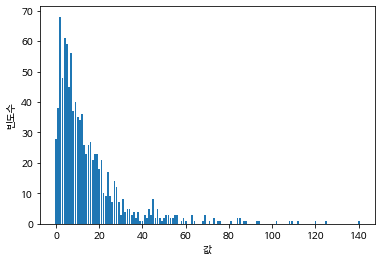

In [30]:
print(X[:5,0])
print("특성 출현 횟수 : \n{}".format(np.bincount(X[:,0].astype(int))))


bins = np.bincount(X[:,0]) # 0번 특성의 빈도수
plt.bar(range(len(bins)), bins)
plt.xlabel("값")
plt.ylabel("빈도수")


In [31]:
from sklearn.linear_model import Ridge


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge = Ridge().fit(X_train, y_train)

ridge.score(X_test, y_test)

# 릿지 점수
# 비선형이기 때문에 점수가 좀 떨어진다

0.6224186236310756

Text(0, 0.5, '빈도수')

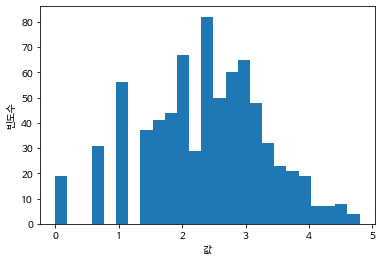

In [32]:
X_train_log = np.log(X_train+1) # log(0) 방지
X_test_log = np.log(X_test+1)

plt.hist(X_train_log[:,0], bins=25)
plt.xlabel("값")
plt.ylabel("빈도수")

# X 데이터에 대해서 로그화

In [33]:
ridge = Ridge().fit(X_train_log, y_train)

ridge.score(X_test_log, y_test)

0.8749342372887815

로그 스케일로 변환하여 큰 값을 작은 값으로 변환해 왜곡을 줄임

- 성능이 개선됨


- 트리기반 모델은 특성 전처리가 많이 필요하지 않다
- 선형 모델은 전처리가 필요하다
- ((구간 분할,다항식, 상호작용)) - 선형, 나이브 베이즈 모델에 영향을 줌
- svm, knn 등은 적용해서 성능향상이 되는 경우가 있다


# 특성 자동 선택

- 일변량 통계
- 모델 기반 선택
- 반복적 선택


>- 데이터를 훈련/테스트로 나눈 후 훈련 데이터에만 특성 선택을 사용해야 함


- 특징 선택이 어려울 때! 예측 속도를 높일 때! 해석이 쉬운 모델을 위해

## 일변량 통계

- 특성과 타깃 사이의 중요한 통계적 관계가 있는지 계산
- Anova > 분산분석, 클래스별 평균 비교,,, F값이 크면 클래스별 평균이 서로 다른 것


- 일변량 분석 ? = (일원, 이원, 다원) /  종속 변수가 1개
- 모델에 상관없이 사용가능

### ANOVA

- 집단간의 평균 제곱 / 집단내의 평균제곱 = F값

### 단변량 통계
- p-value = tail area / 높으면 연관성이 작아서 제외함
- SelectKBest = 고정된 k개 특성 선택
- Selectpercentile = 지정된 비율로 선택

In [34]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = np.random.RandomState(0).normal(size=(len(cancer.data),50))
# 노이즈 특성 50개
# 원본 특성 30개 + 노이즈 50개
X_and_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_and_noise, cancer.target,
                                                   random_state=0,
                                                   test_size=.5)
# 훈련 : 테스트 50 : 50으로 나눔

select = SelectPercentile(score_func=f_classif, percentile=60)
# f값을 이용하고 특성의 60퍼센트를 선택함

select.fit(X_train, y_train) # 적용

X_train_selected = select.transform(X_train)

print("X_train.shape : ", X_train.shape)
print("X_train_selected.shape : ", X_train_selected.shape)

X_train.shape :  (284, 80)
X_train_selected.shape :  (284, 48)


(원본 30 + 노이즈 50) 중 50% = 40개가 선택됨

[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
 False False False  True False  True False False False  True False False
 False False  True False  True  True  True False  True  True  True  True
 False  True False False  True False  True False False False  True False
 False False False False False  True False False]
27


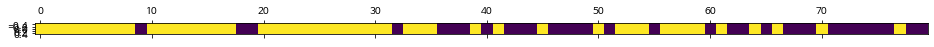

In [35]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1))

original = mask[:30]
print(np.sum(original==True))

노란색이 선택된 부분... 원본의 3개의 특성이 선택되지 않음

In [36]:
lr = LogisticRegression(max_iter=4000)

X_test_selected = select.transform(X_test)



lr.fit(X_train, y_train)
print("전체 특성 사용 점수 = {:.3f}".format(lr.score(X_test,y_test)))

lr.fit(X_train_selected, y_train)
print("선택된 일부 특성 사용 점수 = {:.3f}".format(lr.score(X_test_selected, y_test)))



전체 특성 사용 점수 = 0.940
선택된 일부 특성 사용 점수 = 0.951


In [37]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=42,
                                                   test_size=.2)
## 노이즈 없는 원본

lr = LogisticRegression(max_iter = 3000).fit(X_train, y_train)
print("원본 전체 특성 사용 점수 = {:.3f}".format(lr.score(X_test,y_test)))

select = SelectPercentile(percentile = 60)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter = 3000).fit(X_train_selected, y_train)
print("원본 60% 특성 사용 점수 = {:.3f}".format(lr.score(X_test_selected,y_test)))


원본 전체 특성 사용 점수 = 0.956
원본 60% 특성 사용 점수 = 0.965


- 위의 결과를 보면 전체 특성보다 특성을 감소한 후의 결과가 더 좋다
- 하지만 꼭 성능 감소가 좋은 것은 아님,, 테스트 사이즈와 성격, 성능 퍼센트,, 테스트를 나누는 난수값 등 여러 요소에 의해서 조금씩 달라짐

## 모델기반 특징 선택

- 모델로 특징의 중요도를 평가
- 결정트리는 feature_importances_를 제공하기 때문에 이를 사용
- 선형 모델은 coef_ / 특징의 coef_를 보고,,   linear, ridge, lasso ....
- 특징별로 보는 것이 아니라 모든 특징을 한번에 고려함


- SelectFromModel

(341, 40)
28
특성 선택 전 = 0.934
특성 선택 후 = 0.939


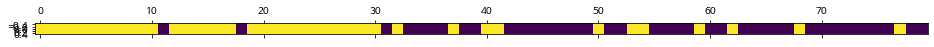

In [38]:
from sklearn.feature_selection  import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                        threshold = 'median')
# 트리 100개
# 일변량 분석보다 강력하고 복잡한 모델
# threshold = 특징 선택의 임계값을 특징 중요도의 중간값으로 사용

X_train, X_test, y_train, y_test = train_test_split(X_and_noise, cancer.target,
                                                   random_state=0,
                                                   test_size=.4)

select.fit(X_train, y_train)
X_train_model = select.transform(X_train)
print(X_train_model.shape)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1))
print(np.sum(mask[:30]==True))

rf = RandomForestClassifier(random_state=42, n_estimators = 100)
rf.fit(X_train, y_train)
print("특성 선택 전 = {:.3f}".format(rf.score(X_test, y_test)))

rf.fit(X_train_model, y_train)
X_test_model = select.transform(X_test)
print("특성 선택 후 = {:.3f}".format(rf.score(X_test_model, y_test)))

#특성 80개 중 40개 선택

랜덤포레스트 - 전체 특성보다 40개로 줄인 후 조금 더 성능이 개선됨

특성 선택 전 = 0.943
특성 선택 후 = 0.947
8


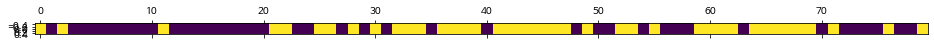

In [39]:

#Logistic으로 성능 비교
select = SelectFromModel(LogisticRegression(max_iter=3000),
                        threshold = 'median')

sc = LogisticRegression(max_iter=3000).fit(X_train, y_train).score(X_test,y_test)
print("특성 선택 전 = {:.3f}".format(sc))

X_train_model = select.fit_transform(X_train, y_train)
X_test_model = select.transform(X_test)

sc = LogisticRegression(max_iter=3000).fit(X_train_model, y_train).score(X_test_model,y_test)
print("특성 선택 후 = {:.3f}".format(sc))

mask = select.get_support()
plt.matshow(mask.reshape(1,-1))
print(np.sum(mask[:30]==True))


로지스틱으로 특성을 선택한 결과

- 원본은 8개밖에 선택되지 않았는데 성능은 거의 비슷하다...

## 반복적 특징 선택

- 특성을 하나씩 추가하면서 모델을 만든다
- 모든 특성에서 하나씩 제거하면서 생성
>- 모든 특성을 포함한 모델을 만든다. 중요도가 낮은 것 제외하고 지정된 개수를 채울때까지 반복함..


- RFE

27


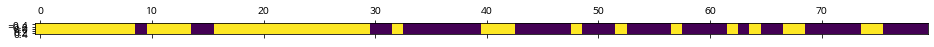

In [40]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),
            n_features_to_select=40)
select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1))
print(np.sum(mask[:30]==True))

#40번 수행해야함,,,, 느리다!

In [41]:
sc = LogisticRegression(max_iter=3000).fit(X_train, y_train).score(X_test,y_test)
print("특성 선택 전 = {:.3f}".format(sc))

X_train_model = select.fit_transform(X_train, y_train)
X_test_model = select.transform(X_test)

sc = LogisticRegression(max_iter=3000).fit(X_train_model, y_train).score(X_test_model,y_test)
print("특성 선택 후 = {:.3f}".format(sc))

특성 선택 전 = 0.943
특성 선택 후 = 0.956


반복적 선택 + 로지스틱 - 성능이 많이 개선됨

### 전문가 지식 활용

In [42]:
bike = mglearn.datasets.load_citibike()

print("시티 바이크 데이터 : \n" , bike.head())
print(bike.shape)

# bike.index, bike.values..

print(bike.index[0]) # 날짜 + 시간
print(bike.values[0]) # 대여횟수

display(bike)

시티 바이크 데이터 : 
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64
(248,)
2015-08-01 00:00:00
3


starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64

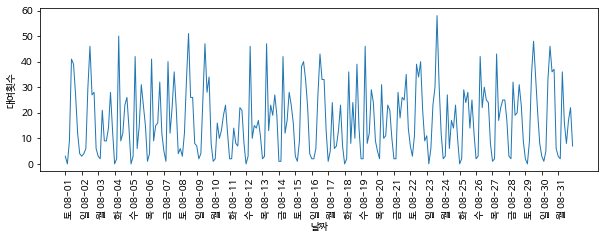

In [43]:
plt.figure(figsize=(10,3))

xticks = pd.date_range(start=bike.index.min(), end=bike.index.max())

week = ["일", "월", "화", "수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime('%w'), 
                                             xticks.strftime(" %m-%d"))]

plt.xticks(xticks, xticks_name, rotation=90, ha='left')
plt.xlabel("날짜")
plt.ylabel("대여횟수")

plt.plot(bike, linewidth=1)

요일로만 나타낸 대여횟수

- 주말에 높고 월, 목 등 평일에 횟수가 줄어드는 편

In [73]:
y = bike.values

X = bike.index.astype('int64').values.reshape(-1,1) // 10**11
# 숫자로 표현하고 10^9로 나눔

print(X[:5])
print(y[:5])
# 날짜와 시간 데이터를 int64로 변환

print(y.shape)

[[14383872]
 [14383980]
 [14384088]
 [14384196]
 [14384304]]
[ 3  0  9 41 39]
(248,)


In [81]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 결정 계수 = {:.3f}".format(regressor.score(X_test, y_test)))
    y_pred_test = regressor.predict(X_test)
    y_pred_train  = regressor.predict(X_train)
    
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0,len(X),8) , xticks_name, rotation=90, ha='left')
    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test)+n_train), y_test,'-', label="테스트")
    
    plt.plot(range(n_train), y_pred_train,'--', label="훈련 예측")
    plt.plot(range(n_train, len(y_test)+n_train), y_pred_test,'--', 
             label="테스트 예측")
    
    plt.legend()
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

테스트 세트 결정 계수 = -0.035


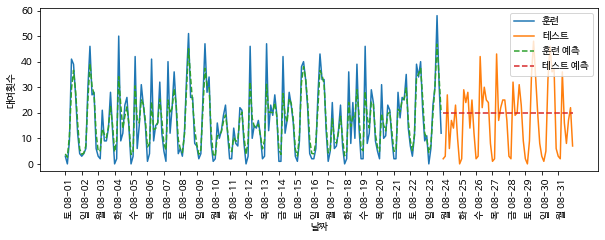

In [82]:
from sklearn.ensemble import RandomForestRegressor

rr = RandomForestRegressor(random_state=0, n_estimators=100)
eval_on_features(X,y,rr)

테스트 세트 결정 계수 = 0.600
[[ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]]


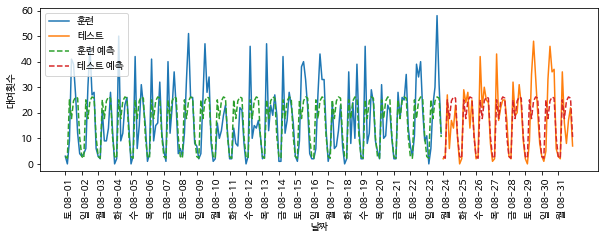

In [83]:
X_hour = bike.index.hour.values.reshape(-1,1)
#시간으로!

eval_on_features(X_hour, y, rr)
print(X_hour[:5])


테스트 세트 결정 계수 = 0.842
[[ 5  0]
 [ 5  3]
 [ 5  6]
 [ 5  9]
 [ 5 12]]


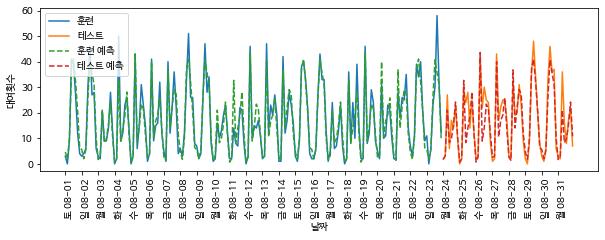

In [86]:
X_hour_week = np.hstack([bike.index.dayofweek.values.reshape(-1,1),
                         bike.index.hour.values.reshape(-1,1)])

eval_on_features(X_hour_week, y, rr)
print(X_hour_week[:5])


테스트 세트 결정 계수 = 0.132
[[ 5  0]
 [ 5  3]
 [ 5  6]
 [ 5  9]
 [ 5 12]]


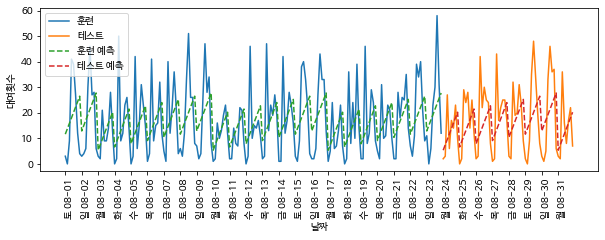

In [87]:
X_hour_week = np.hstack([bike.index.dayofweek.values.reshape(-1,1),
                         bike.index.hour.values.reshape(-1,1)])

eval_on_features(X_hour_week, y, LinearRegression())
print(X_hour_week[:5])


선형모델!..

선형 증가로 훈련을 함 / 성능 악화

테스트 세트 결정 계수 = 0.607
[[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


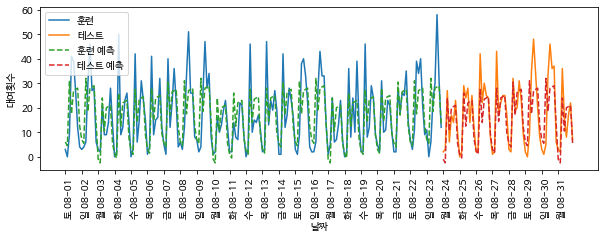

In [89]:
enc=OneHotEncoder()

X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, LinearRegression())
print(X_hour_week_onehot[:5])



테스트 세트 결정 계수 = 0.619
[[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


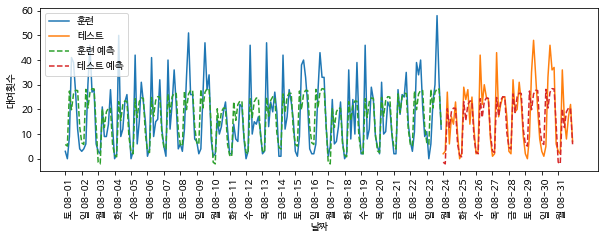

In [90]:
from sklearn.linear_model import Ridge

eval_on_features(X_hour_week_onehot, y, Ridge())
print(X_hour_week_onehot[:5])



테스트 세트 결정 계수 = 0.720
[[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


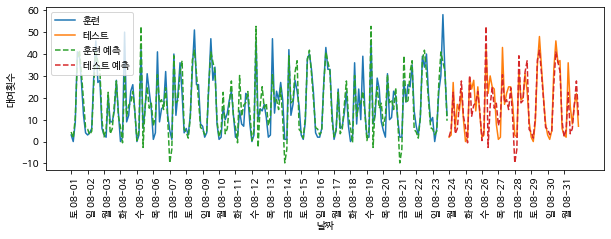

In [98]:
poly = PolynomialFeatures(degree=2, interaction_only=True,
                         include_bias=False)


X_hour_week_onehot_poly = poly.fit_transform(X_hour_week_onehot)

eval_on_features(X_hour_week_onehot_poly, y, LinearRegression())
print(X_hour_week_onehot[:5])



테스트 세트 결정 계수 = 0.845
[[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


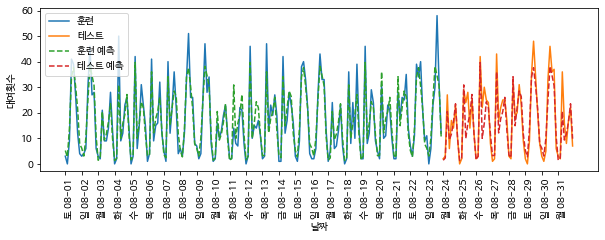

In [102]:
poly = PolynomialFeatures(degree=2, interaction_only=True,
                         include_bias=False)


X_hour_week_onehot_poly = poly.fit_transform(X_hour_week_onehot)
lr=Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)
print(X_hour_week_onehot[:5])



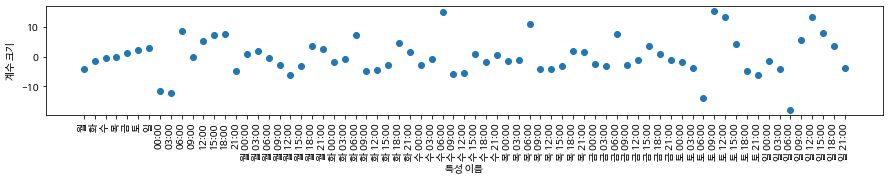

In [106]:
hour= ["%02d:00"%i for i in range(0,24,3)]
day=["월","화","수","목","금","토","일"]
features=day+hour

features_poly = poly.get_feature_names(features)
nonzero = np.array(features_poly)[lr.coef_!=0]
coef_nonzero = lr.coef_[lr.coef_!=0]

plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

plt.xticks(np.arange(len(coef_nonzero)), nonzero,rotation=90)
plt.show()